# ***Done by - Devashree Pravakar***
# ***Multiple Linear Regression***

In [1]:
from google.colab import files  
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [2]:
# Import packages and classes
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline

In [3]:
df=pd.read_csv('50_Startups.csv')
print(df.shape)
print(df.info())

(50, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


14681.4
192261.83


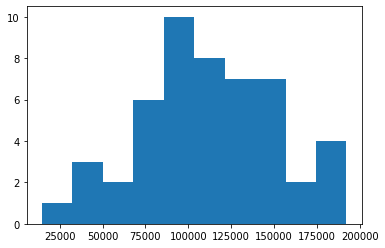

In [4]:
print(df['Profit'].min())
print(df['Profit'].max())
plt.hist(df['Profit'])
plt.show()

**Draw Scatter Plot**

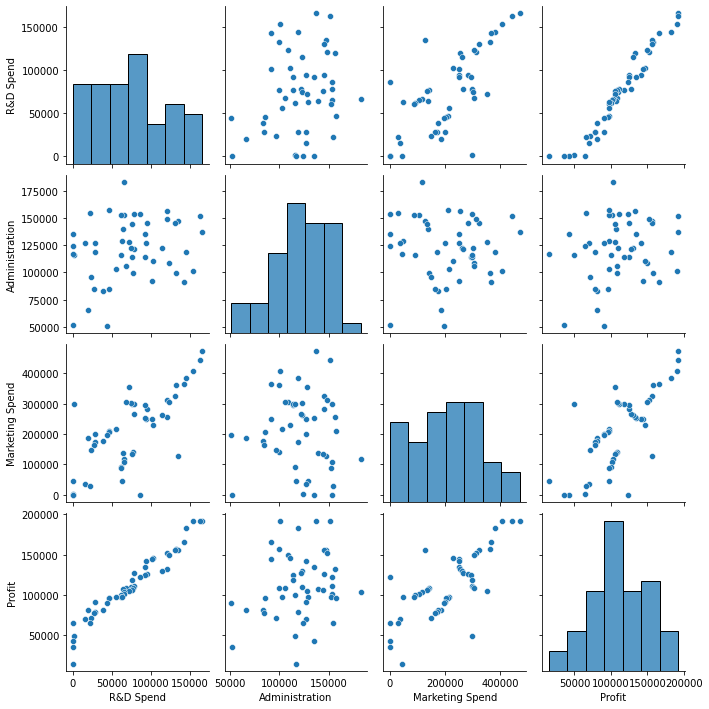

In [5]:
sb.pairplot(df)

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
print(df["State"].unique())
print(df['State'].value_counts())

['New York' 'California' 'Florida']
New York      17
California    17
Florida       16
Name: State, dtype: int64


**Replacing Categorical Values with Numeric**

In [8]:
df.State.replace(('New York', 'California', 'Florida'),(1,2,3), inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


**Plotting Pairwise Relationship between dataset**

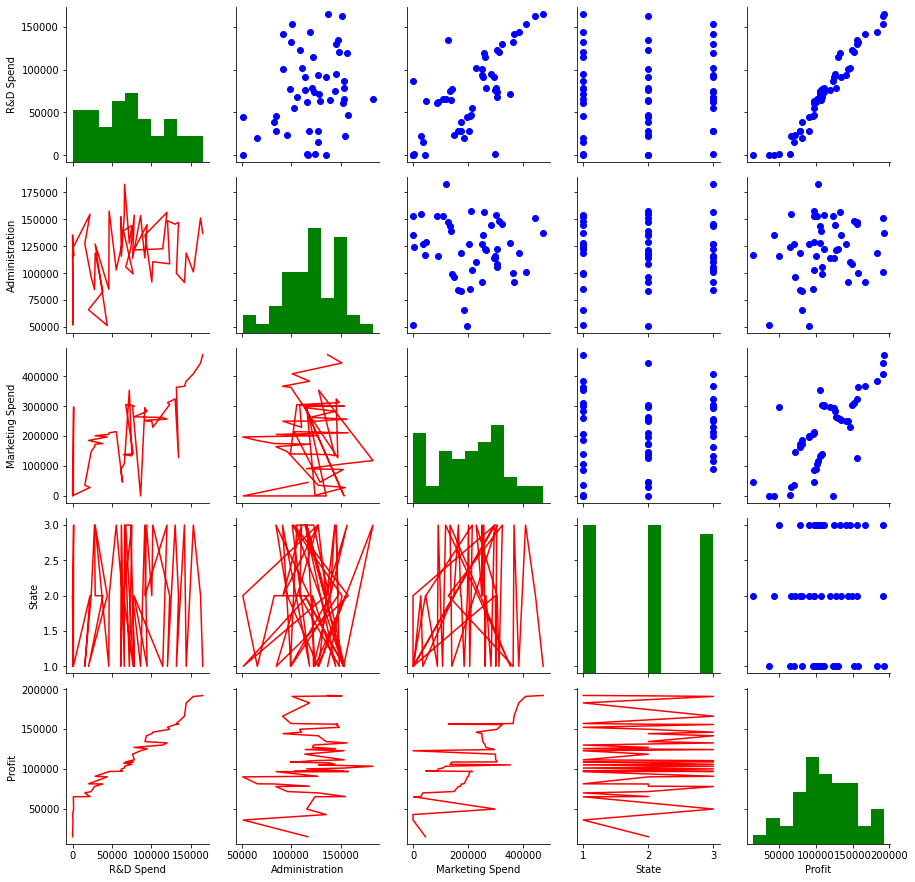

In [9]:
g = sb.PairGrid(data=df)
g.map_upper(plt.scatter, color='blue')
g.map_lower(plt.plot, color='red')
g.map_diag(plt.hist, color='green')

**Heatmap to show Correlation Between two variables**

                 R&D Spend  Administration  Marketing Spend     State    Profit
R&D Spend         1.000000        0.241955         0.724248  0.037930  0.972900
Administration    0.241955        1.000000        -0.032154  0.003026  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.137777  0.747766
State             0.037930        0.003026         0.137777  1.000000  0.048471
Profit            0.972900        0.200717         0.747766  0.048471  1.000000


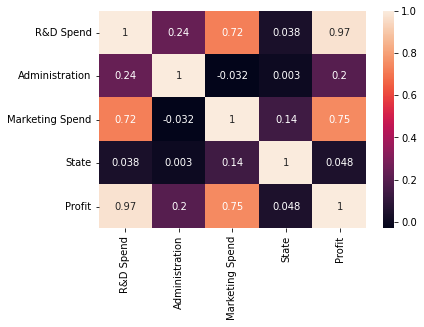

In [10]:
df1 = df.corr()
print(df1)
sb.heatmap(df1, annot=True)

**Checking for NULL Values**

In [11]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Input & Output splitting**

In [12]:
from sklearn import linear_model
regress = linear_model.LinearRegression()
df2 = df.values
train_x = df2[:,:-1]
train_y = df2[:,4]
print(train_x.shape)
print(train_y.shape)

(50, 4)
(50,)


**MinMax Normalisation**

In [13]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)

**Regression Line Fitting**

In [14]:
regress.fit(train_x, train_y)
print("Coefficients: ", regress.coef_)
print("Intercept: ", regress.intercept_)

Coefficients:  [133279.53801303  -3545.08917071  12750.67692487    237.02931182]
Intercept:  48660.75318330045


**Prediction**

In [15]:
y_predicted = regress.predict(train_x)
for i in range(len(train_x)):
  print(train_y[i], y_predicted[i])

192261.83 192380.47776923393
191792.06 189136.73196691694
191050.39 182258.5452986965
182901.99 173569.8957391024
166187.94 172257.0839535144
156991.12 163457.13099750946
156122.51 158149.16251674242
155752.6 160134.25056651374
152211.77 151616.22724134233
149759.96 154886.84673323107
146121.95 135637.49679507065
144259.4 135582.33329337437
141585.52 129256.81740213526
134307.35 127485.64715981031
132602.65 149669.76935995193
129917.04 146122.1897742993
126992.93 116908.41787759925
125370.37 130064.80945603603
124266.9 129125.44720981394
122776.86 115560.33969270141
118474.03 116626.50011055898
111313.02 117181.43585233226
110352.25 114809.10921281141
108733.99 110099.20778473269
108552.04 113265.90604557564
107404.34 102248.68224084999
105733.54 110733.61162468165
105008.31 114261.61959473185
103282.38 101786.58057560984
101004.64 101691.64635406194
99937.59 99594.48431041985
97483.56 97586.89721470304
97427.84 99032.15366376852
96778.92 98032.2094771727
96712.8 89026.35764009776
9647

**Plotting**

Text(0.5, 0, 'Profit')

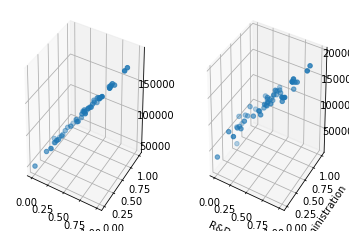

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = fig.add_subplot(121, projection = '3d')
ax.scatter(train_x[:,0], train_x[:,1], y_predicted)
ax = fig.add_subplot(122, projection = '3d')
ax.scatter(train_x[:,0], train_x[:,1],train_y)
ax.set_xlabel("R&D Spend")
ax.set_ylabel("Administration")
ax.set_zlabel("Profit")

**Metrics**

In [17]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(train_y, y_predicted))
print("Mean Squared Error: ", metrics.mean_squared_error(train_y, y_predicted))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))


Mean Absolute Error:  6468.386693409216
Mean Squared Error:  78408131.04834402
Root Mean Squared Error:  8854.836590719447


In [18]:
from sklearn.metrics import r2_score

print("R2_score: %.2f(RMSE): ", r2_score(train_y, y_predicted))

R2_score: %.2f(RMSE):  0.9507516438334586
